### Gravity effect of a point mass

$U = G \frac{M}{R}$

$F_x = -G \frac{m\Delta x}{R^3} \quad F_y = -G \frac{m\Delta y}{R^3} \quad F_z = -G \frac{m\Delta z}{R^3}$

$U$ - gravitational potential, $G$ - gravitational constant ($G = 6.77 * 10^{-11} m^3 kg^{-1}s^{-2}$), $R$ - displacement vector (distance between source and current points), $F_x, F_y, F_z$ - gravity vector components, 

In [1]:
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interactive
from IPython.display import display

In [2]:
import matplotlib.pyplot as plt
from matplotlib import colors

In [3]:
def potential_total_force(m, ns, es, ds):

    G = 6.67 * 10**-11

    X = np.linspace(-1500, 1500, 50)
    Y = np.linspace(-1500, 1500, 50)
    Z = np.linspace(0, 500, 25)

    N, E, D = np.meshgrid(X, Y, Z)
    
    r = np.sqrt((N-ns)**2 + (E-es)**2 + (D-ds)**2)
    
    U = G * m/r
    F_total = -G * m/(r**2)
    
    Fx = -G * m * (N[:, :, 0] - ns)/(r[:, :, 0]**3) * 100000
    Fy = -G * m * (E[:, :, 0] - es)/(r[:, :, 0]**3) * 100000
    Fz = -G * m * (D[:, :, 0] - ds)/(r[:, :, 0]**3) * 100000
    
    fig, axs = plt.subplots(nrows=1, ncols=4,
                           figsize=(15, 4))

    im1 = axs[0].contourf(E[:, :, 0], N[:, :, 0], U[:, :, 0],
                       levels=np.linspace(np.quantile(U, 0.05), np.quantile(U, 0.95), 20),
                       extend='both', cmap='viridis', alpha=0.6)
    axs[0].set_title('Grav.potential', fontweight='bold')  
    axs[0].set_xlabel(r'$East (m)$', labelpad=.5)
    axs[0].set_ylabel(r'$North (m)$', labelpad=.5)
    cb = fig.colorbar(im1, ax = axs[0], orientation='horizontal', label=r'$U (m^2 / s^2)$', pad=0.17, format='%.2f')
    cb.ax.locator_params(nbins=5)

    
    im2 = axs[1].contourf(E[:, :, 0], N[:, :, 0], Fx, 
                          levels=np.linspace(np.quantile(Fx, 0.05), np.quantile(Fx, 0.95), 20),
                          extend='both', cmap='coolwarm', alpha=0.6)
    axs[1].set_title('Grav.vector component X', fontweight='bold')
    axs[1].set_xlabel(r'$East (m)$', labelpad=.5)
    axs[1].set_ylabel(r'$North (m)$', labelpad=.5)
    cb = fig.colorbar(im2, ax=axs[1], orientation='horizontal', label=r'$F_x (mGal)$', pad=0.17)
    cb.ax.locator_params(nbins=5)
    
    im3 = axs[2].contourf(E[:, :, 0], N[:, :, 0], Fy,
                         levels=np.linspace(np.quantile(Fy, 0.05), np.quantile(Fy, 0.95), 20),
                         extend='both', cmap='coolwarm', alpha=0.6)
    axs[2].set_title('Grav.vector component Y', fontweight='bold')
    axs[2].set_xlabel(r'$East (m)$', labelpad=.5)
    axs[2].set_ylabel(r'$North (m)$', labelpad=.5)
    cb = fig.colorbar(im3, ax=axs[2], orientation='horizontal', label=r'$F_y (mGal)$', pad=0.17)
    cb.ax.locator_params(nbins=5)
        
    im4 = axs[3].contourf(E[:, :, 0], N[:, :, 0], Fz,
                         levels=np.linspace(np.quantile(Fz, 0.05), np.quantile(Fz, 0.95), 20),
                         extend='both', cmap='coolwarm', alpha=0.6)
    axs[3].set_title('Grav.vector component Z', fontweight='bold')
    axs[3].set_xlabel(r'$East (m)$', labelpad=.5)
    axs[3].set_ylabel(r'$North (m)$', labelpad=.5)
    cb = fig.colorbar(im4, ax=axs[3], orientation='horizontal', label=r'$F_z (mGal)$', pad=0.17)
    cb.ax.locator_params(nbins=5)
    
    
    plt.tight_layout()

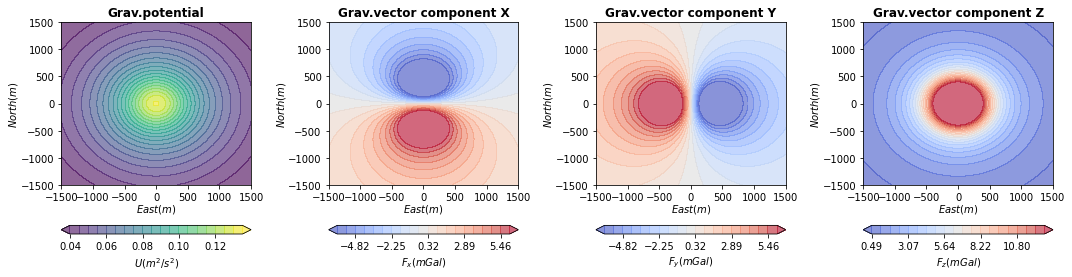

In [4]:
potential_total_force(m=10**12, ns=0, es=0, ds=500)

In [5]:
interact(potential_total_force,
         m=widgets.IntSlider(min=10**2, max=10**12,
                             step=10, description=r'M: '),
         ns=widgets.IntSlider(value=0, min=-1500, max=1500,
                         step=10, description=r'X: '),
         es=widgets.IntSlider(value=0, min=-1500, max=1500,
                         step=10, description=r'Y: '),
         ds=widgets.IntSlider(value=250, min=10, max=500, 
                       step=10, description=r'Z: '));

interactive(children=(IntSlider(value=100, description='M: ', max=1000000000000, min=100, step=10), IntSlider(…